In [1]:
import pandas as pd

In [2]:
df = pd.read_sas("C:/Users/Malcolm/Documents/MedicalExpenditure/data/h216.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')

In [3]:
df.head()

,DUID,PID,DUPERSID,PANEL,FAMID31,FAMID42,FAMID53,FAMID19,FAMIDYR,CPSFAMID,...,RXPTR19,RXOTH19,PERWT19F,FAMWT19F,FAMWT19C,SAQWT19F,VSAQW19F,DIABW19F,VARSTR,VARPSU
0,2320002.0,101.0,2320002101,23.0,B,B,B,B,B,B,...,0.0,0.0,14602.115869,13727.593908,13727.593908,13985.516019,0.0,0.0,2019.0,1.0
1,2320002.0,102.0,2320002102,23.0,A,A,A,A,A,A,...,0.0,0.0,25324.216045,18586.327532,18586.327532,28061.590938,0.0,0.0,2019.0,1.0
2,2320002.0,103.0,2320002103,23.0,A,A,A,A,A,A,...,0.0,0.0,19455.742319,18586.327532,18586.327532,0.000000,0.0,0.0,2019.0,1.0
3,2320005.0,101.0,2320005101,23.0,A,A,A,A,A,A,...,0.0,0.0,5919.292270,6692.229133,6692.229133,0.000000,0.0,0.0,2079.0,1.0
4,2320005.0,102.0,2320005102,23.0,A,A,A,A,A,A,...,7.0,0.0,5356.640305,6692.229133,6692.229133,0.000000,0.0,0.0,2079.0,1.0


In [4]:
df.shape

(28512, 1447)

Huge dataset with 1447 columns! We need to make sense of this. First off, we can see by examining the documentation that the column for our target data is TOTEXP19

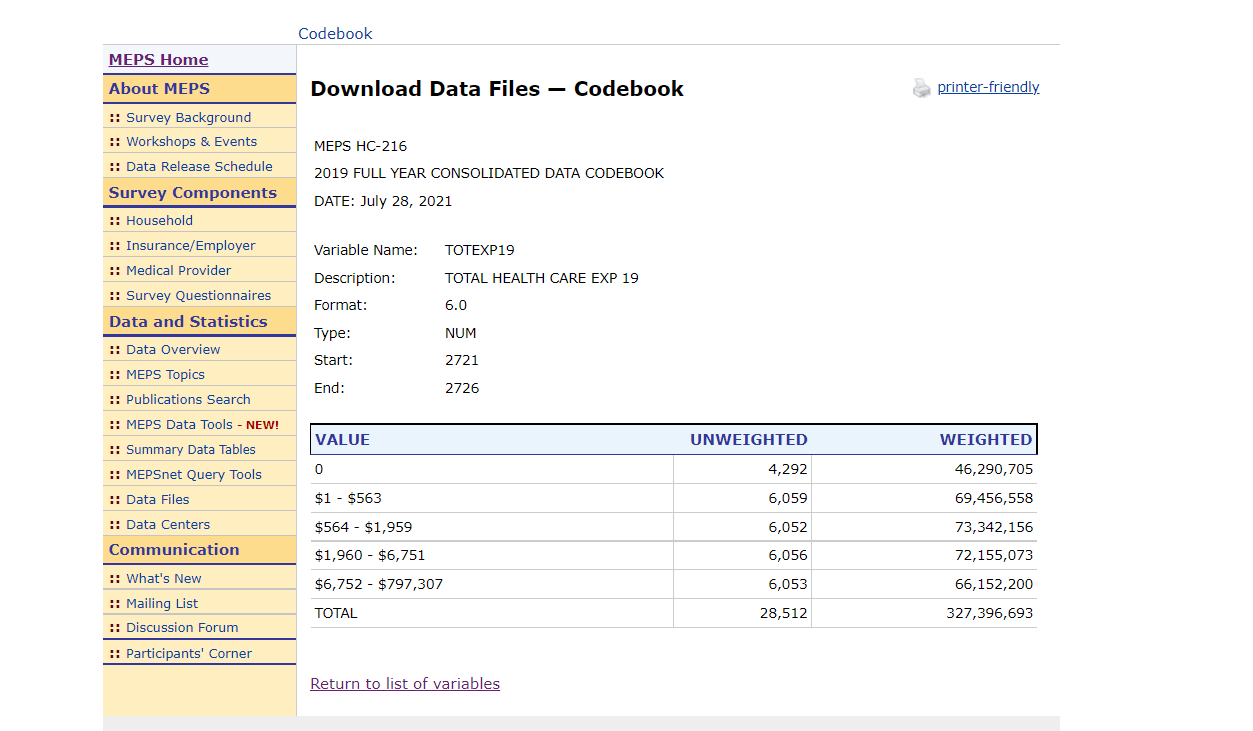

We'll have to limit our analysis to include only a small subset of these columns to make a model that is reusable with

The two immediate criterion that come to mind for the removal of columns are the following:

    1. Remove any values are related to payments for healthcare except for the target column
    2. Leave any columns that can be inputted by a front-end user to predict their predicted medical expenditure per year

We should look through the codebook describing the variables (https://www.meps.ahrq.gov/mepsweb/data_stats/download_data_files_codebook.jsp?PUFId=H216) and select any values that is approprate to retain for our prediction. Ideally these variables should describe the following:

- Demographics
- Medical History
- Utilization
- Economic Status
- Education status

After a readthrough of the data's documentation I've selected the following 52 columns to keep:

### Demographics

| Column      | Description |
| ----------- | ----------- |
| AGE19X | age of patient |
| RACETHX | race of patient |
|HISPANX | ethnicity of patient|
| SEX | patient’s gender |
| OTHLGSPK | patient speaks other language at home |
| HWELLSPK | how well the patient speaks english|
| BORNUSA | patient is born in the USA |
| YRSINUS | years patient have lived in the us|
| MARRY19X | marital status |
| ACTDTY53 | patient is military full-time |
| REGION53 | Region |

### Medical History and Health Status

| Column      | Description |
| ----------- | ----------- |
| HIBPDX | the subject is diagnosed with high blood pressure|
| CHDDX | the subject is diagnosed with coronary heart disease |
| ANGIDX | the subject is diagnosed with angina |
| MIDX | the subject is diagnosed with a heart attack |
| OHRTDX | the subject is diagnosed with any other heart condition |
| STRKDX | the subject has been diagnosed with a stroke |
| EMPHDX | the subject has been diagnosed with emphysema before |
| CHBRON31 | the subject has had chronic bronchitis within the last 12 months |
| CHOLDX  | the subject has been diagnosed with high |
| CANCERDX  | the subject has been diagnosed with some sort of cancer |
| DIABDX_M18 | the subject has been diagnosed with diabetes |
| JTPAIN31_M18 | the subject has had joint pain within the last 12 months |
| ARTHDX | the subject has been diagnosed with athritis |
| ASTHDX | the subject has been diagnosed with asthma |
| ADHDADDX | the subject has been diagnosed with adhd/add |
| LFTDIF31 | difficulty lifting 10 pounds |
| STPDIF31 | difficulty walking up 10 steps |
| WLKDIF31 | difficulty walking 3 blocks |
| MILDIF31 | difficulty walking a mile |
| STNDIF31 | difficulty standing 20 minutes |
| BENDIF31 | difficulty bending or stooping |
| RCHDIF31 | difficulty reaching over head |
| FNGRDF31 | difficulty using fingers to grasp |
| COGLIM31 | subject has any cognitive limitation |
| PERWT19F | subject's weight |
| DSFTNV53 | ever had feet checked for sores |
| PSTATS53 | disposition status |


### Utilization

| Column      | Description |
| ----------- | ----------- |
| OBTOTV19 | Total Office Visits to Physicians |
| OPTOTV19 | Total Outpatient Visits |
| ERTOT19 | Total Emergency Room Visits |
| IPNGTD19 | Total number of nights in hospital |
| IPDIS19 | Total number of hospital discharges |
| RXTOT19 | Total prescription medicines |
| DVTOT19 | Total dental visits |
| HHTOTD19 | Total home health care days|


### Economic Status

| Column      | Description |
| ----------- | ----------- |
| TTLP19X | patient's total income |
| EMPST31 | employment status |
| INSURC19 | insurance status and type|

### Education Status 

| Column      | Description |
| ----------- | ----------- |
| HIDEG | the highest degree of education attained at the time the individual entered MEPS |
| FTSTU19X | indicates whether a patient is a fulltime student |

In [6]:
# create new df with only these rows

reduced_df = df[['DUPERSID','AGE19X','RACETHX','HISPANX','SEX','OTHLGSPK','HWELLSPK','BORNUSA','YRSINUS','MARRY19X',
                                         'ACTDTY53','REGION53','HIBPDX','CHDDX','ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON31','CHOLDX',
                                         'CANCERDX','DIABDX_M18','JTPAIN31_M18','ARTHDX','ASTHDX','ADHDADDX','LFTDIF31','STPDIF31','WLKDIF31',
                                         'MILDIF31','STNDIF31','BENDIF31','RCHDIF31','FNGRDF31','COGLIM31','PERWT19F','DSFTNV53','PSTATS53',
                                         'OBTOTV19','OPTOTV19','ERTOT19','IPNGTD19','IPDIS19','RXTOT19','DVTOT19','HHTOTD19','TTLP19X','EMPST31',
                                         'INSURC19','HIDEG','FTSTU19X']]

In [7]:
reduced_df.head()

,DUPERSID,AGE19X,RACETHX,HISPANX,SEX,OTHLGSPK,HWELLSPK,BORNUSA,YRSINUS,MARRY19X,...,IPNGTD19,IPDIS19,RXTOT19,DVTOT19,HHTOTD19,TTLP19X,EMPST31,INSURC19,HIDEG,FTSTU19X
0,2320002101,32.0,3.0,2.0,1.0,2.0,-1.0,1.0,-1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,40000.0,1.0,1.0,3.0,-1.0
1,2320002102,42.0,3.0,2.0,2.0,2.0,-1.0,1.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,40000.0,1.0,1.0,3.0,-1.0
2,2320002103,16.0,3.0,2.0,2.0,2.0,-1.0,1.0,-1.0,5.0,...,3.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,8.0,-1.0
3,2320005101,72.0,2.0,2.0,2.0,1.0,1.0,1.0,-1.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,-1.0
4,2320005102,83.0,2.0,2.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,0.0,0.0,12.0,0.0,0.0,0.0,4.0,4.0,3.0,-1.0
